In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diamonds.csv')

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
df=df[["Unnamed: 0","carat","cut","color","clarity","depth","table","x","y","z","price"]]  #cambio ordine alle colonne

In [9]:
df = df.drop("Unnamed: 0",axis=1)  #elimino Unnamed :0

In [10]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


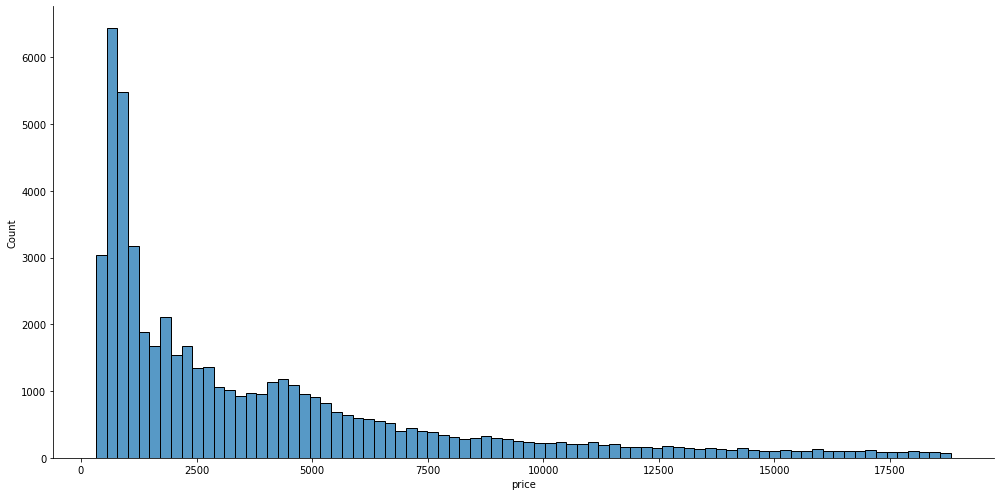

In [42]:
### esplorazione target con displot

sns.displot(df["price"], height =7,aspect=2) 
plt.show()

In [46]:
df["price"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64>

In [43]:
print("Skewness:",df["price"].skew())
print("Kurtosis:",df["price"].kurt())

Skewness: 1.618395283383529
Kurtosis: 2.17769575924869


In [44]:
# matrice di correlazione
df.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387,0.921591
depth,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924,-0.010647
table,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929,0.127134
x,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772,0.884435
y,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006,0.865421
z,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000,0.861249
price,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249,1.000000


In [55]:
cond1 =df["x"]>3
cond2 = df["x"]<7
df[cond1 & cond2] ["price"].mean()

2727.8680588310963

In [56]:
cond3 =df["price"]>2000
df[cond3]["depth"].mean()

61.777530017152934

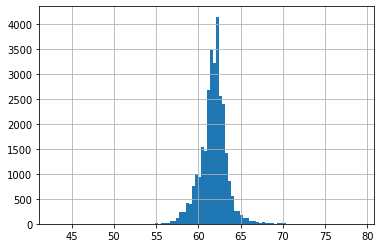

In [58]:
cond3 =df["price"]>2000
df[cond3]["depth"].hist(bins=100)

In [59]:
cond1 =df["x"]>3
cond2 = df["y"]<7
df[cond1 | cond2] ["carat"].mean()

0.7979397478679852

In [60]:
df["volume"]= df["x"]*df["y"]*df["z"]
cond =df["price"]>(df["price"].mean()+df["price"].std())
df[cond]["volume"].mean()

262.54520014880075

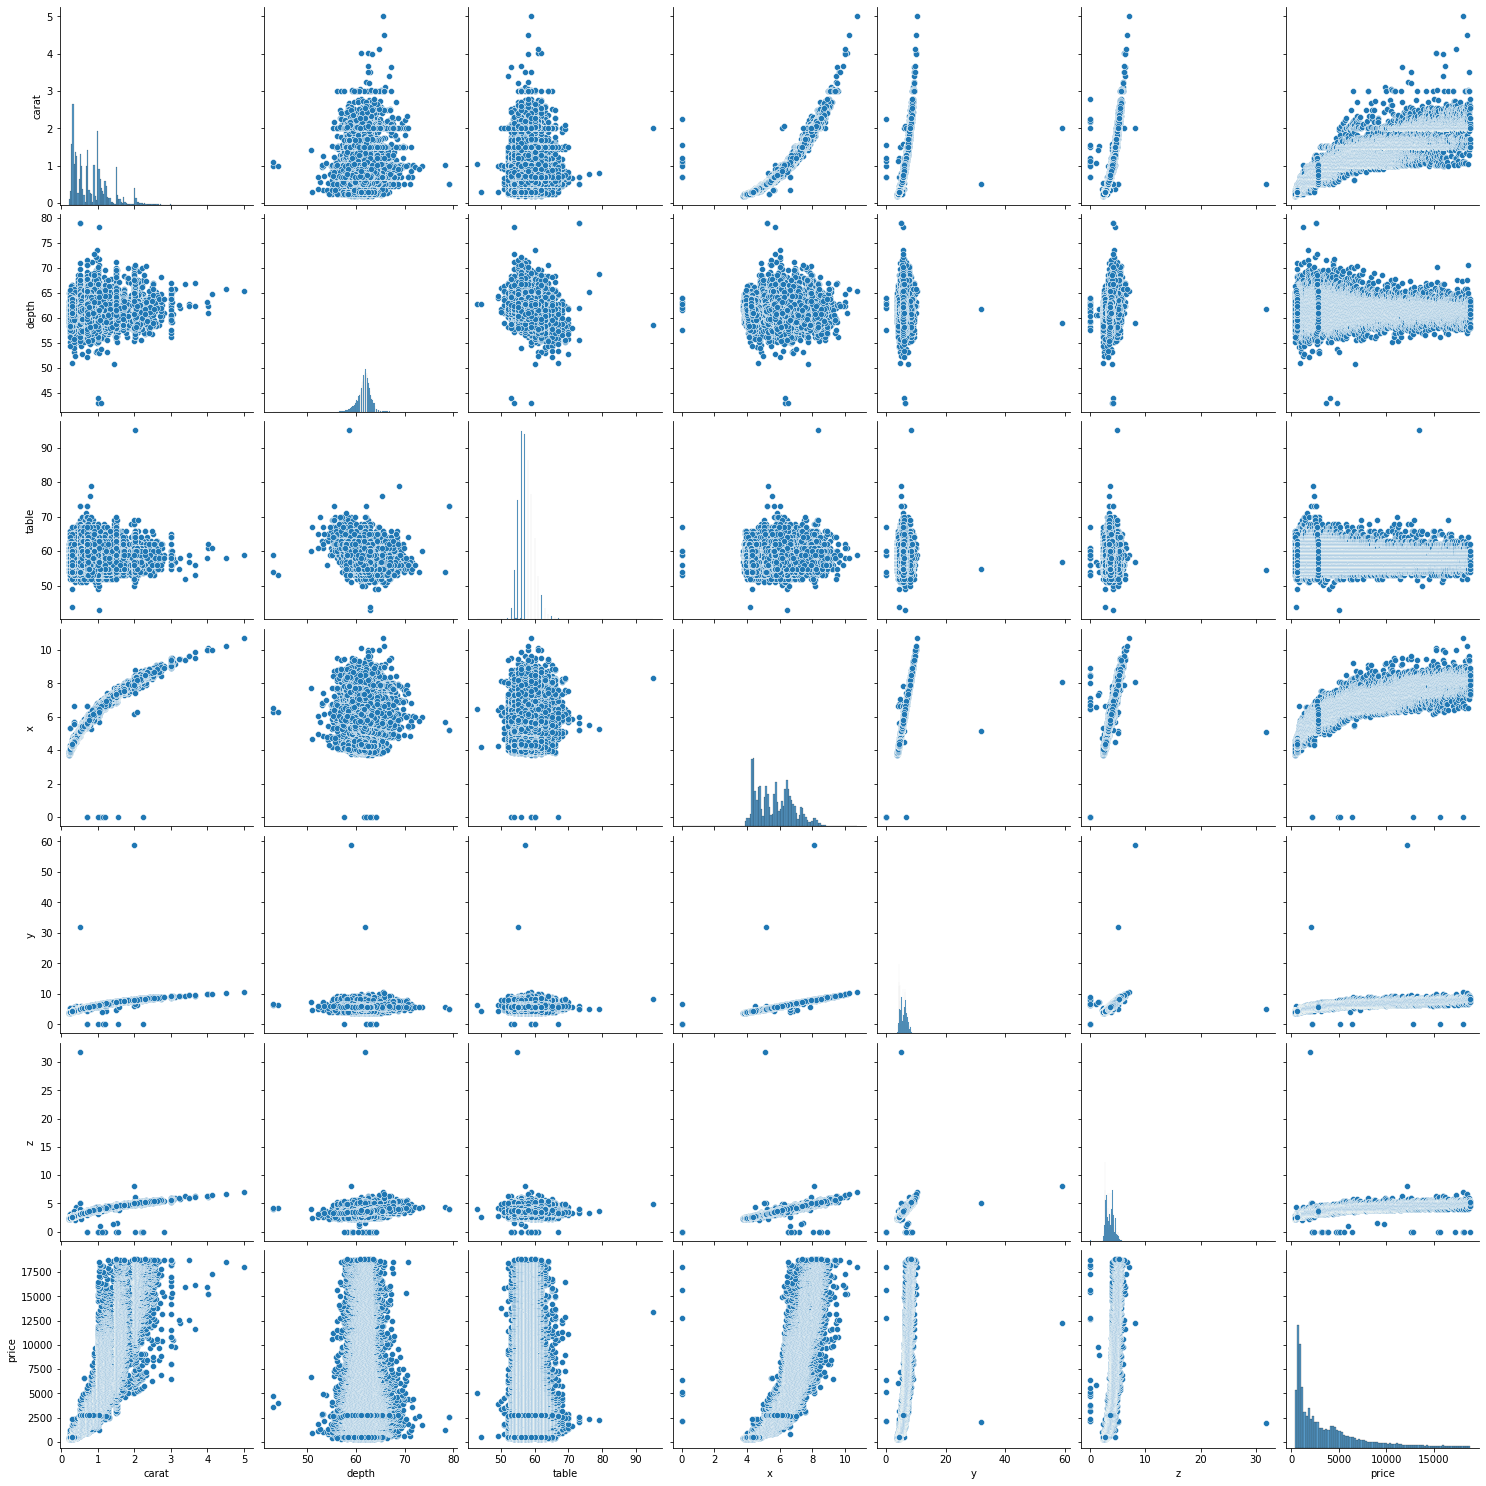

In [45]:
sns.pairplot(df, height=3, aspect=1);

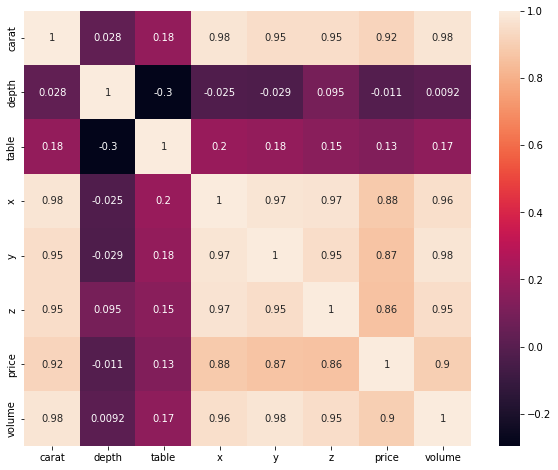

In [64]:
import seaborn as sns
plt.figure(figsize=(10,8))
  #sns.heatmap(corr_matrix, annot=True)
sns.heatmap(df.corr(),annot=True);   # heatmap con tutte le correlazioni

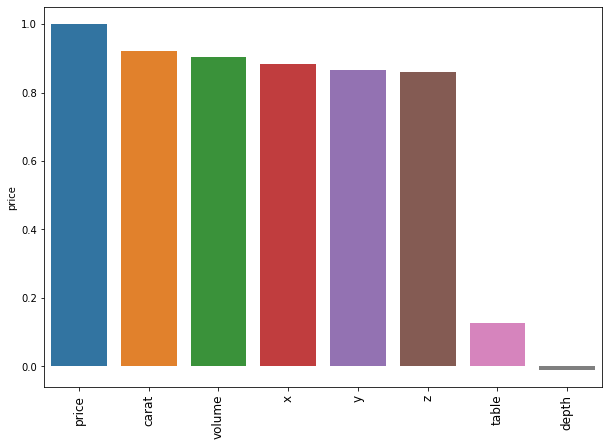

In [65]:
price_corr = df.corr() ["price"].sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [49]:
categorical_features = [col for col in df.columns if df[col].dtype==object]

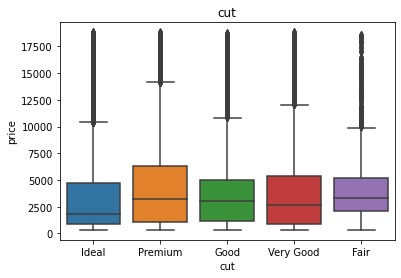

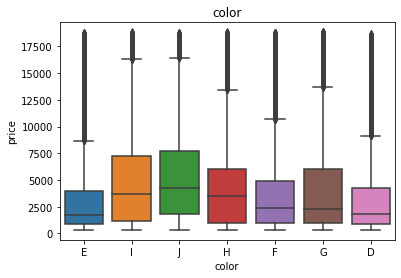

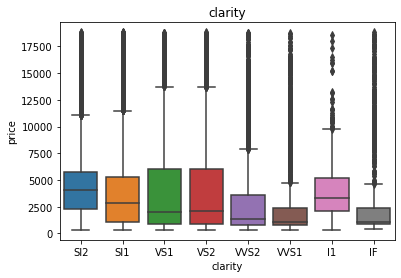

In [51]:
for feature in categorical_features:
  sns.boxplot(x=feature,y=df["price"],data=df)
  plt.title (feature)
  plt.show()